In [35]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library
import sddk

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
PIPA_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1rV4t0_UV_wcx--UAHVwkqB8Wa_5n9mnpV05yGG1OHqk/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [19]:
keyed_vectors = KeyedVectors.load("../data/keyed_vectors.wv")

In [20]:
keywords = ['λυπέω',
            'λυπηρός',
            'λύπη',
            'ἄλγος',
            'ἄλγημα',
            'ἀλγέω',
            'ὀδύνη',
            'ὀδυνάω',
            'πονέω',
            'πόνος']

In [21]:
mostsimilar_dict = {}
for keyword in keywords:
    most_similar = [tup[0] + " ({})".format(str(np.round(tup[1], 2))) for tup in keyed_vectors.most_similar(keyword)]
    mostsimilar_dict[keyword] = most_similar

In [22]:
mostsimilar_df = pd.DataFrame(mostsimilar_dict)
mostsimilar_df

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.53),ἀλγεινός (0.59),ἐπιθυμία (0.59),πόθος (0.67),ἰξύα (0.8),ὀδυνάω (0.59),στραγγουρία (0.67),ἰξύα (0.77),ταλαιπωρέω (0.62),πλησμονή (0.54)
1,λυπηρός (0.52),λύπη (0.57),σωματικός (0.58),τάλας (0.67),ὀσφῦς (0.77),δακρύω (0.54),βήξ (0.67),μετάφρενον (0.76),γυμνάζω (0.51),ταλαιπωρία (0.48)
2,ἥδομαι (0.51),ἡδύς (0.56),ἡδονή (0.57),ἄχος (0.66),τράχηλος (0.75),νείαιρα (0.52),θέρμη (0.66),βουβών (0.74),ταλαιπωρία (0.51),εὐεξία (0.46)
3,εὐφραίνω (0.5),ἀκόλαστος (0.55),λυπηρός (0.57),πῆμα (0.66),φρικώδης (0.75),ἰξύα (0.51),νείαιρα (0.66),νείαιρα (0.73),διαπονέω (0.49),ἐκπονέω (0.45)
4,ἀκόλαστος (0.47),ἀηδής (0.53),ἀλγηδών (0.54),τλήμων (0.64),ὑποχόνδριος (0.75),ὑποχόνδριος (0.5),δίψα (0.65),πλευρόν (0.73),εὐεξία (0.45),πονέω (0.45)
5,ὀλιγωρέω (0.47),λυπέω (0.52),ἀκολασία (0.54),μέλεος (0.64),κενεών (0.75),ψαύω (0.5),βληχρός (0.65),ἄλγημα (0.72),παραμένω (0.45),κόπος (0.44)
6,δυσχεραίνω (0.46),βλαβερός (0.52),φθόνος (0.48),στένω (0.64),ὀδυνώδης (0.74),βαρύνω (0.49),ἄλγημα (0.65),ὕφαιμος (0.72),πόνος (0.45),ἄλγημα (0.43)
7,διψάω (0.45),σωματικός (0.51),πόθος (0.47),τλάω (0.63),ἀσώδης (0.74),πυρεταίνω (0.49),κόπος (0.63),ὑποχόνδριος (0.72),ἰσχναίνω (0.44),δίψα (0.42)
8,ἀπολαύω (0.44),ἐπιθυμία (0.51),ὄρεξις (0.46),ἄτη (0.63),θέρμη (0.73),οἰδέω (0.48),βουβών (0.63),ἤρ (0.72),λεπτύνω (0.43),βήξ (0.42)
9,ἀγανακτέω (0.44),συζάω (0.51),λήθη (0.46),δύστηνος (0.62),ὀδυνάω (0.72),πλευρόν (0.47),διάρροια (0.62),πυρεταίνω (0.71),διαθερμαίνω (0.42),ἀκμή (0.41)


In [24]:
set_with_dataframe(PIPA_data.add_worksheet("mostsimilar", 1,1), mostsimilar_df)

In [29]:
def get_sim_matrix(words):
    df = pd.DataFrame(cosine_similarity(keyed_vectors[words]), columns=words, index=words)
    return df

In [34]:
sim_matrix = get_sim_matrix(keywords).round(2)
sim_matrix

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
λυπέω,1.00,0.52,0.37,0.25,0.04,0.37,0.05,0.13,0.29,0.11
λυπηρός,0.52,1.00,0.57,0.28,0.05,0.24,0.05,0.03,0.17,0.22
λύπη,0.37,0.57,1.00,0.35,0.12,0.10,0.09,0.06,0.08,0.22
ἄλγος,0.25,0.28,0.35,1.00,0.44,0.41,0.38,0.45,0.19,0.40
ἄλγημα,0.04,0.05,0.12,0.44,1.00,0.46,0.65,0.72,0.34,0.43
ἀλγέω,0.37,0.24,0.10,0.41,0.46,1.00,0.45,0.59,0.35,0.13
ὀδύνη,0.05,0.05,0.09,0.38,0.65,0.45,1.00,0.59,0.29,0.38
ὀδυνάω,0.13,0.03,0.06,0.45,0.72,0.59,0.59,1.00,0.38,0.28
πονέω,0.29,0.17,0.08,0.19,0.34,0.35,0.29,0.38,1.00,0.45
πόνος,0.11,0.22,0.22,0.40,0.43,0.13,0.38,0.28,0.45,1.00


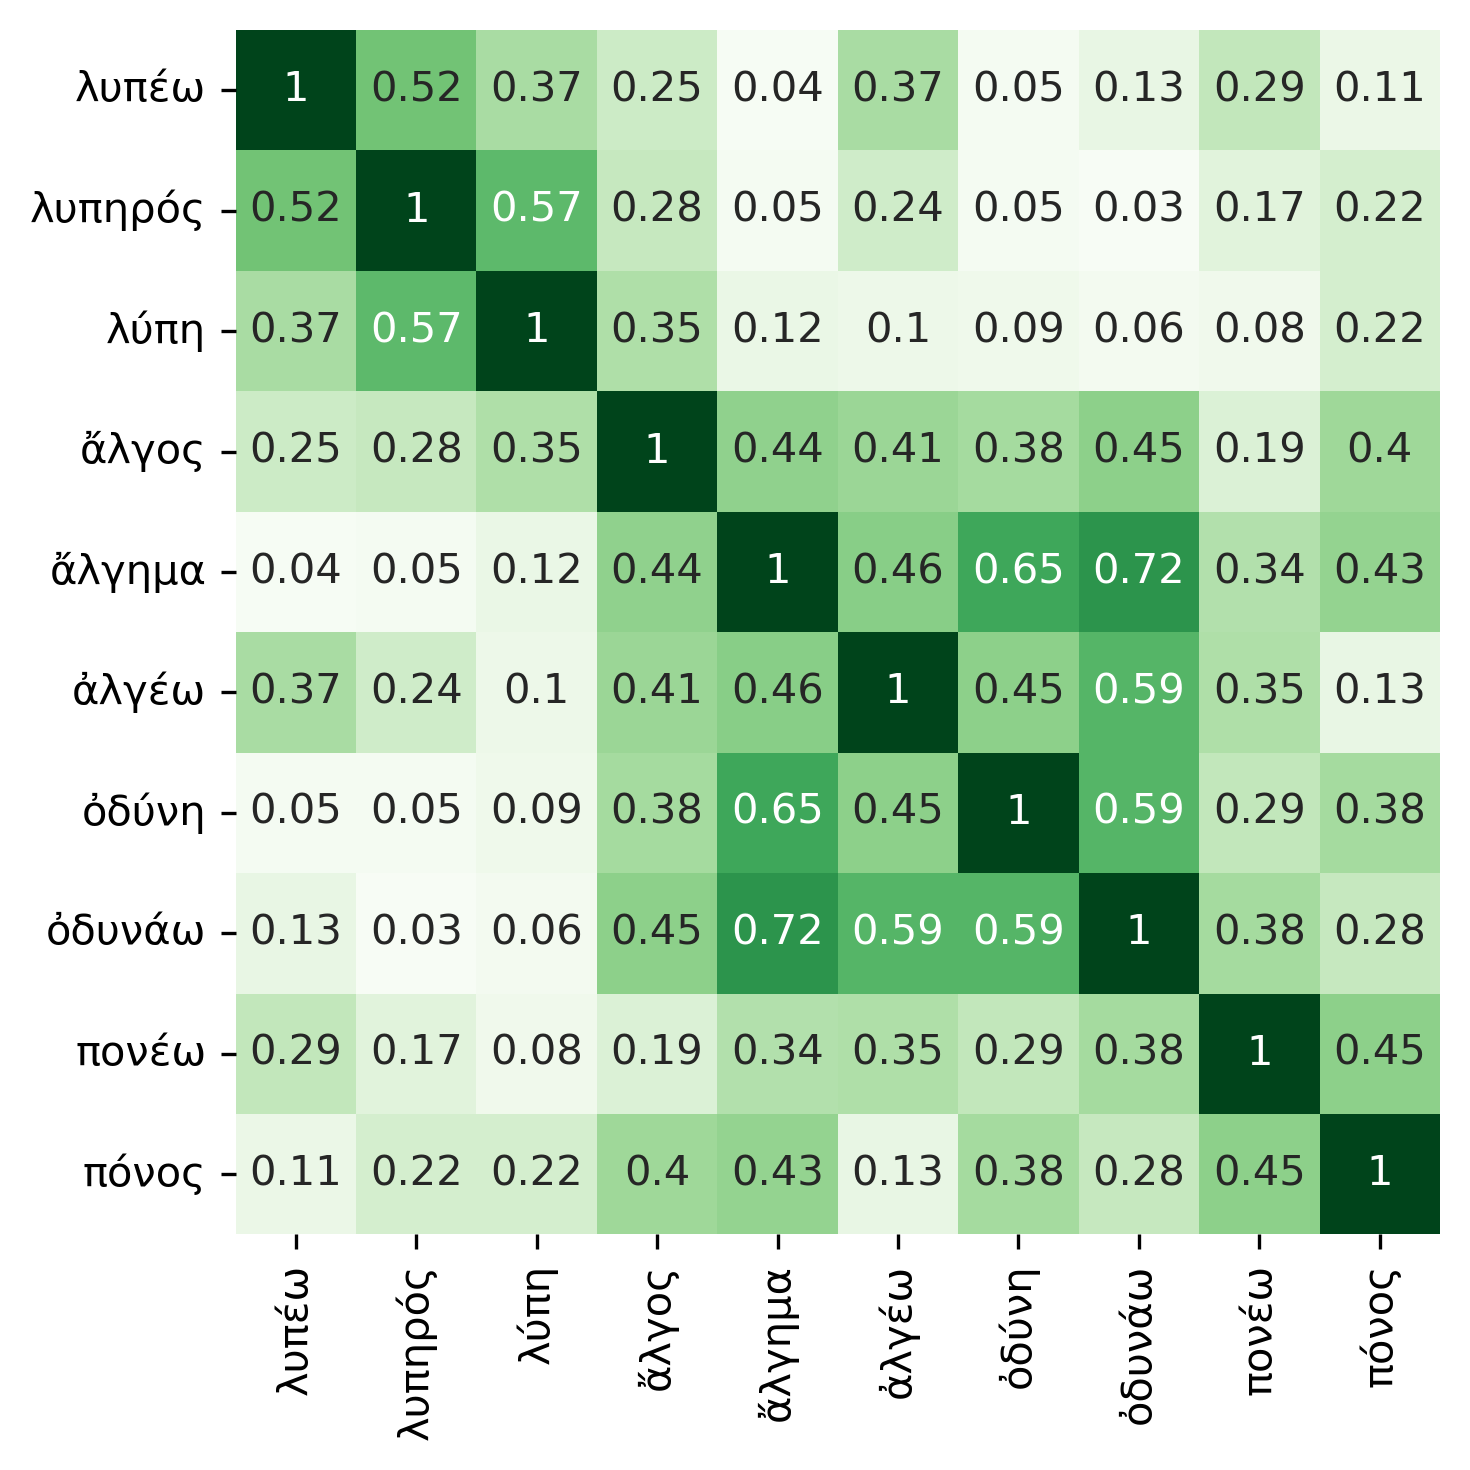

In [36]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrix.round(2), annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [38]:
fig.savefig("../figures/keywords_similarity_matrix.png")